In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import numpy as np 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree 

import warnings
warnings.filterwarnings("ignore")

In [6]:
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv", index_col=0)

In [7]:
X_train = pd.get_dummies(train.drop('Status', axis=1), 
                         drop_first=True)
le = LabelEncoder()
y_train = le.fit_transform(train['Status'])
print(le.classes_)

['C' 'CL' 'D']


In [8]:
params = {
    'max_depth': [None, 4,3,2], 
    'min_samples_split': range(2,35, 5),
    'min_samples_leaf': range(1,35, 5),
    'max_features':[3,4,5,6,7]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
rf = RandomForestClassifier(random_state=24, n_estimators=25)
gcv = GridSearchCV(rf, param_grid=params, cv=kfold, scoring='neg_log_loss', n_jobs=-1)

gcv.fit(X_train, y_train)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'max_features': 4, 'min_samples_leaf': 16, 'min_samples_split': 2}
-0.4781561489354026


In [9]:
best_tree = gcv.best_estimator_
dum_tst = pd.get_dummies(test, drop_first=True)
y_pred_prob = best_tree.predict_proba(dum_tst)
print(y_pred_prob)

[[0.72036542 0.03672922 0.24290536]
 [0.73065823 0.09335569 0.17598607]
 [0.13044637 0.04526872 0.82428491]
 ...
 [0.91596448 0.02066613 0.06336939]
 [0.97426146 0.00702082 0.01871772]
 [0.36887066 0.05232358 0.57880576]]


In [10]:
submit = pd.DataFrame({'id':list(test.index),
                       'Status_C':y_pred_prob[:,0],
                       'Status_CL':y_pred_prob[:,1],
                       'Status_D':y_pred_prob[:,2]})
submit.to_csv("sbt_rf.csv", index=False)

<Axes: xlabel='Fea_Imp', ylabel='Features'>

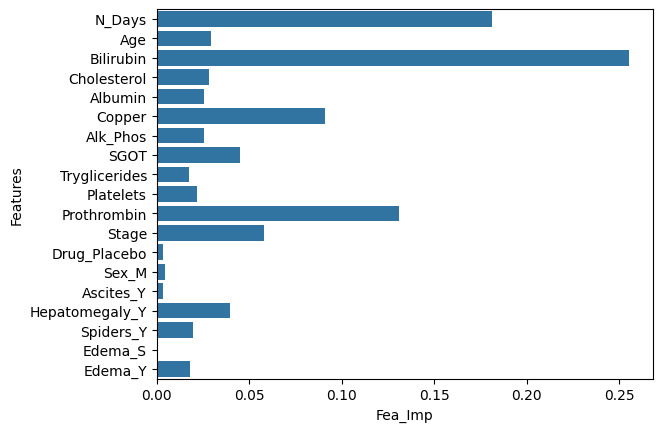

In [16]:
import seaborn as sns
df_imp = pd.DataFrame({'Features':list(X_train.columns),'Fea_Imp':list(best_tree.feature_importances_)})
sns.barplot(data=df_imp, y="Features", x="Fea_Imp", orient='h')